

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные


In [1]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [5]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

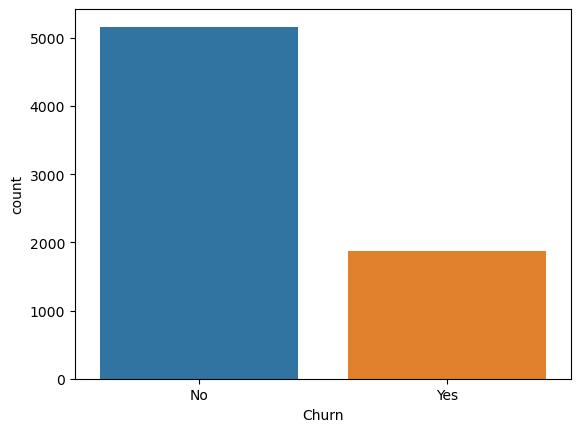

In [7]:
sns.countplot(data=df,x='Churn');

**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

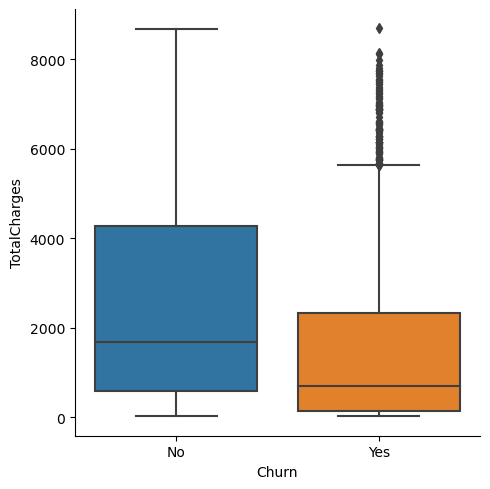

In [8]:
sns.catplot(data=df, x='Churn', y='TotalCharges', kind='box');

**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

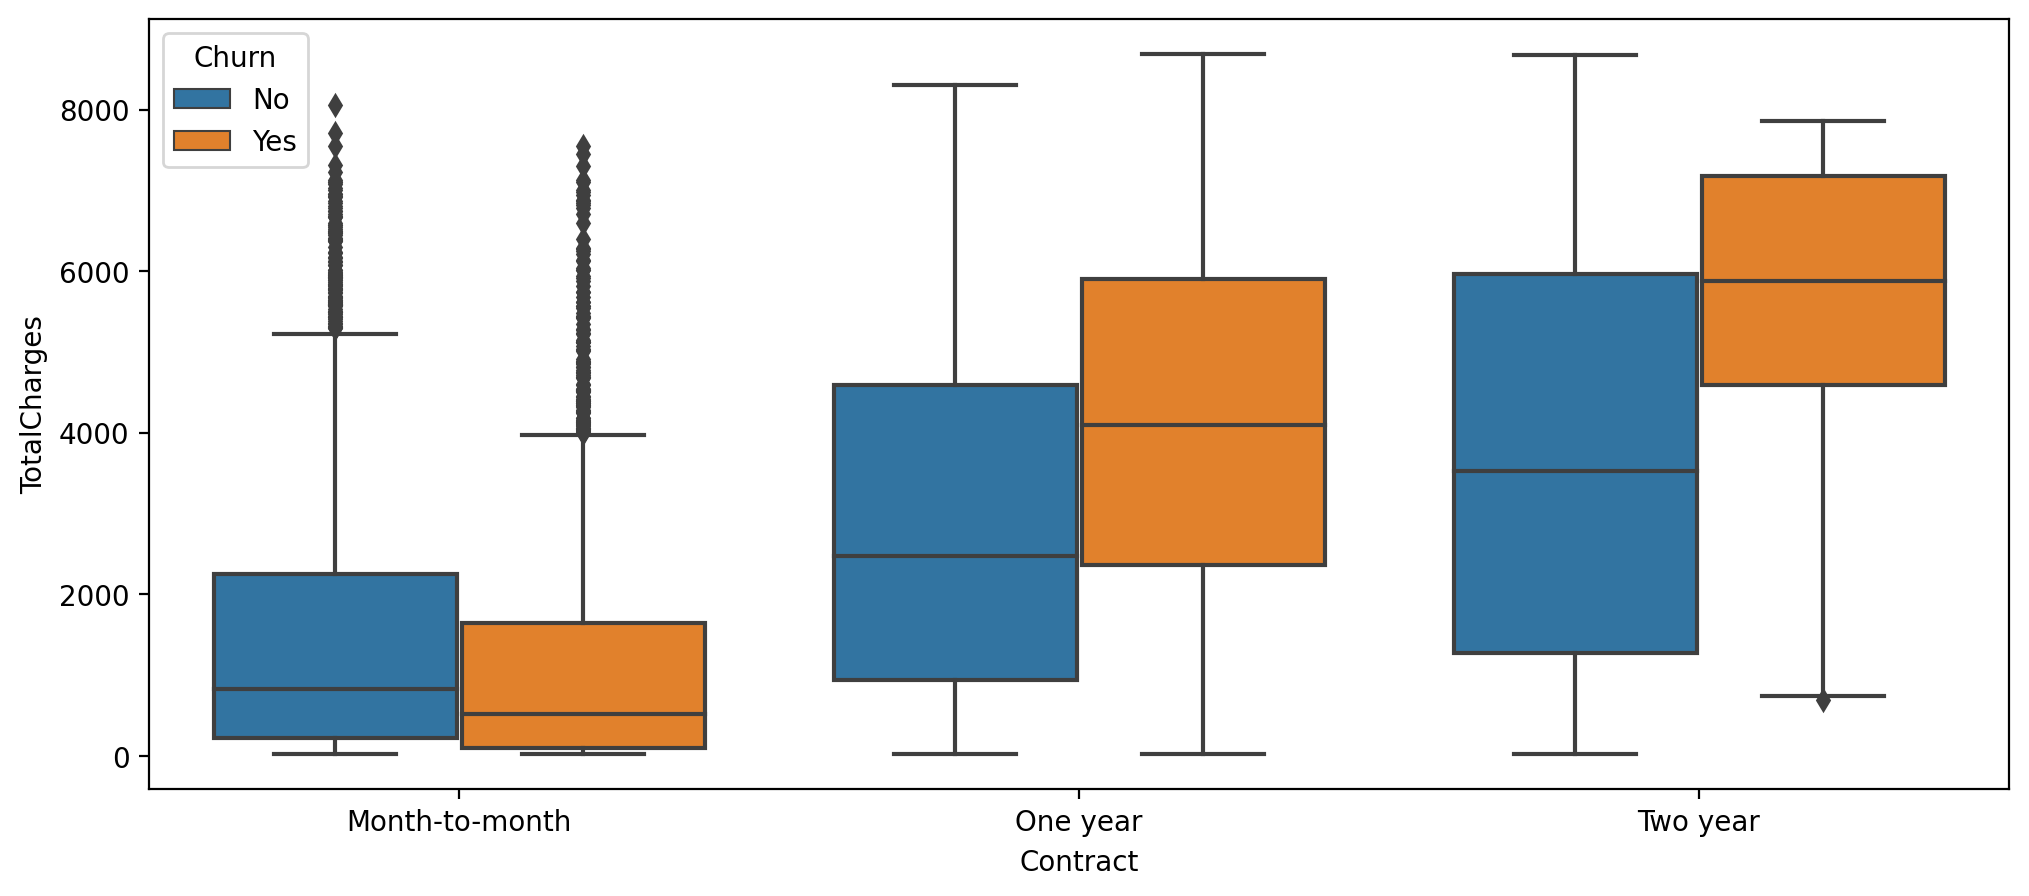

In [9]:
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges',hue='Churn')

**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Мы специально привели список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

In [10]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [11]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [12]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

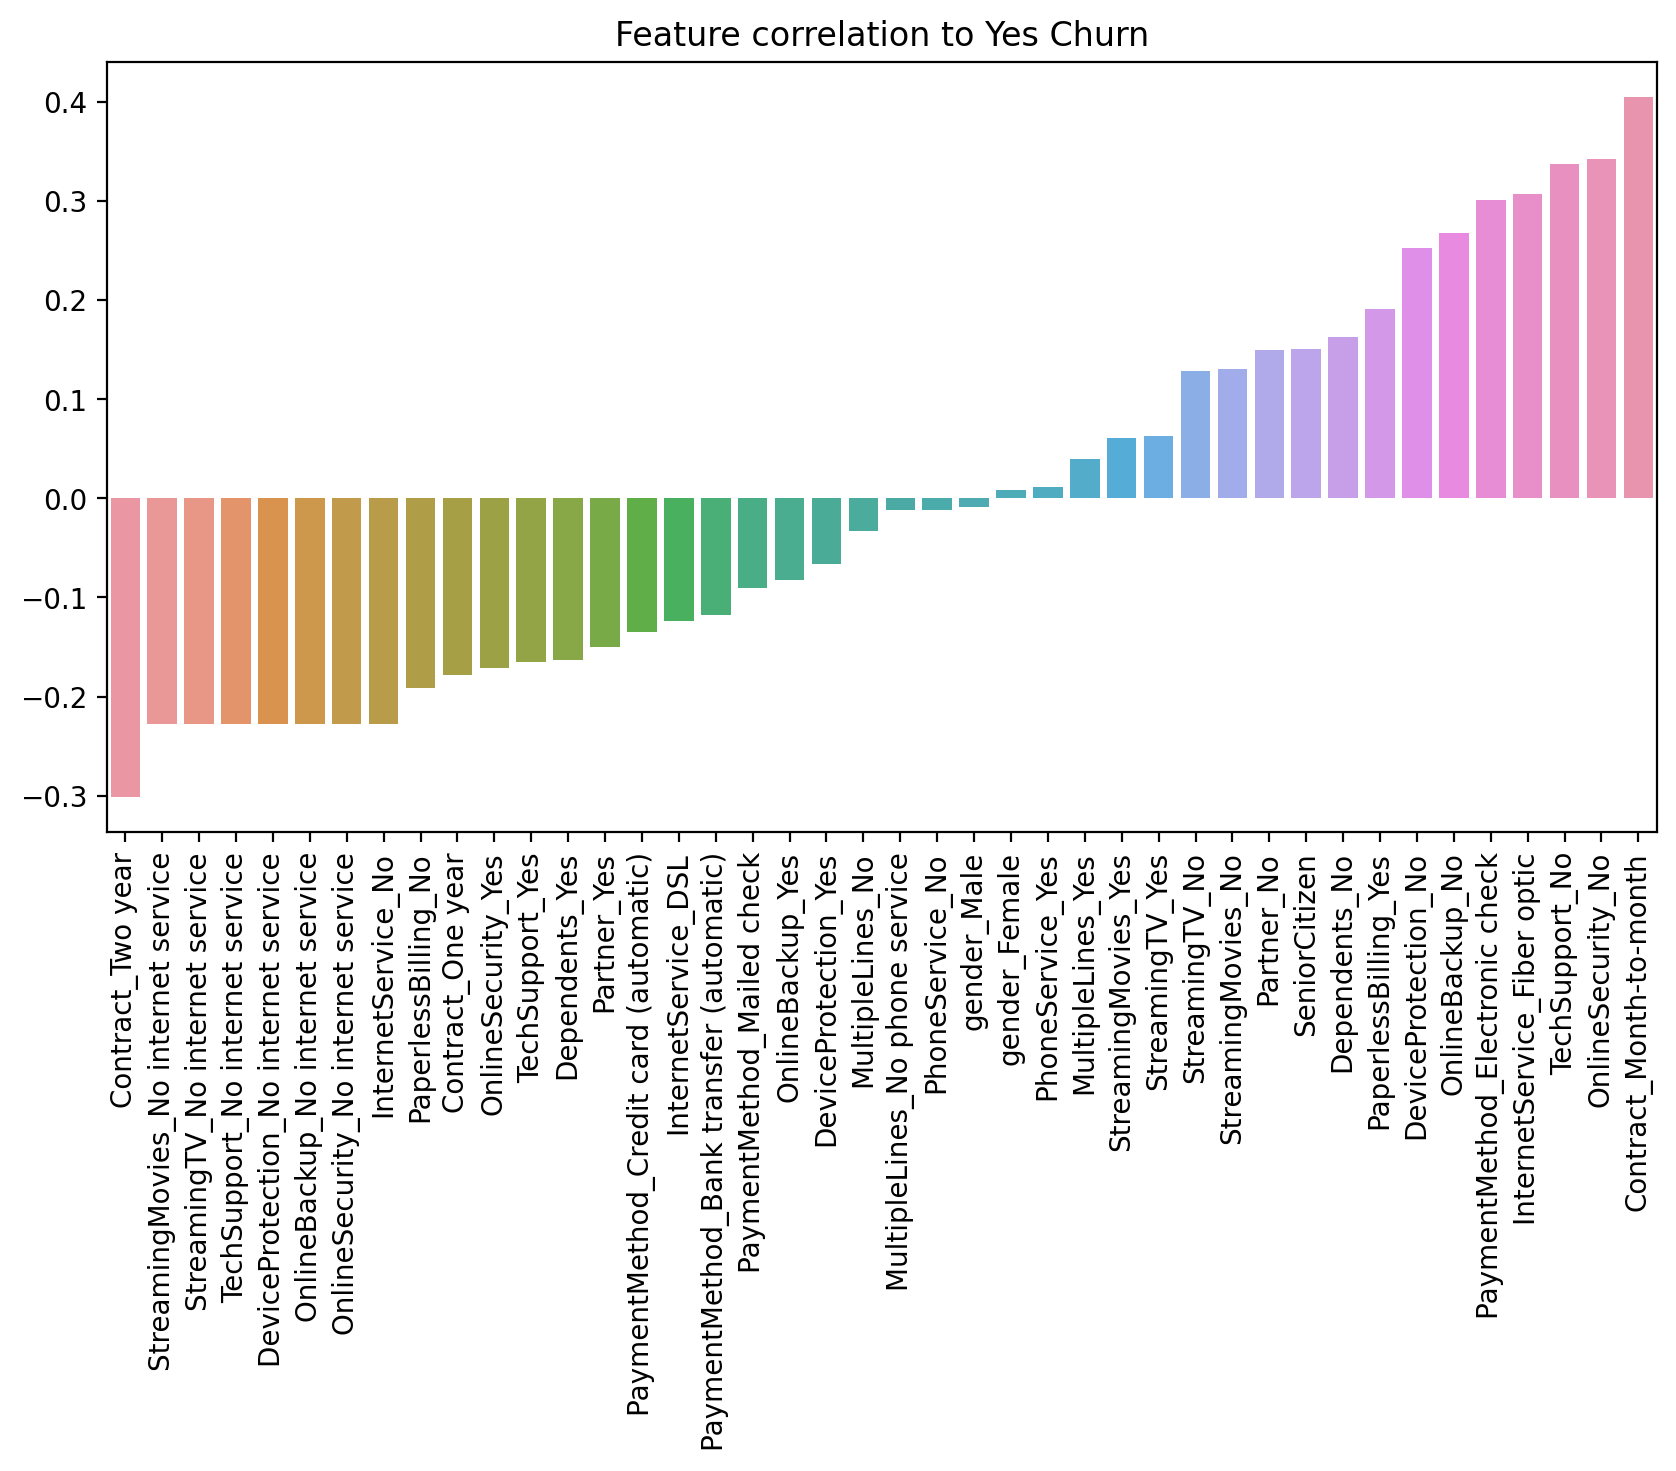

In [13]:
plt.figure(figsize=(10,5), dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index, y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature correlation to Yes Churn')
plt.xticks(rotation=90);

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

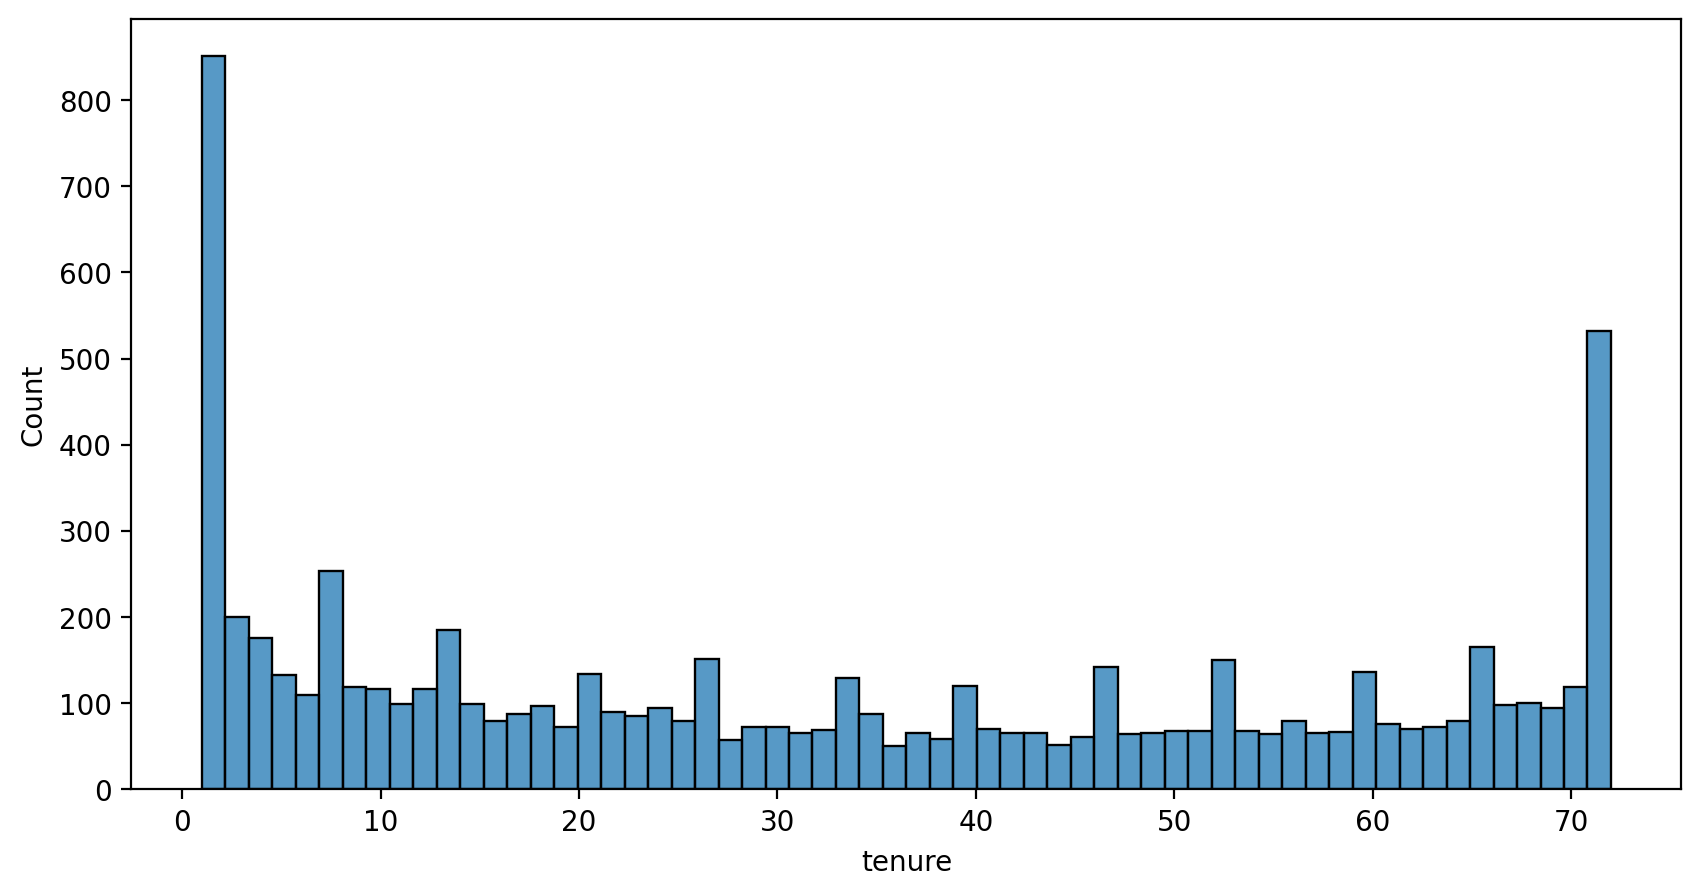

In [15]:
plt.figure(figsize=(10,5), dpi=200)
sns.histplot(data=df, x='tenure', bins=60);

**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

<Figure size 2000x600 with 0 Axes>

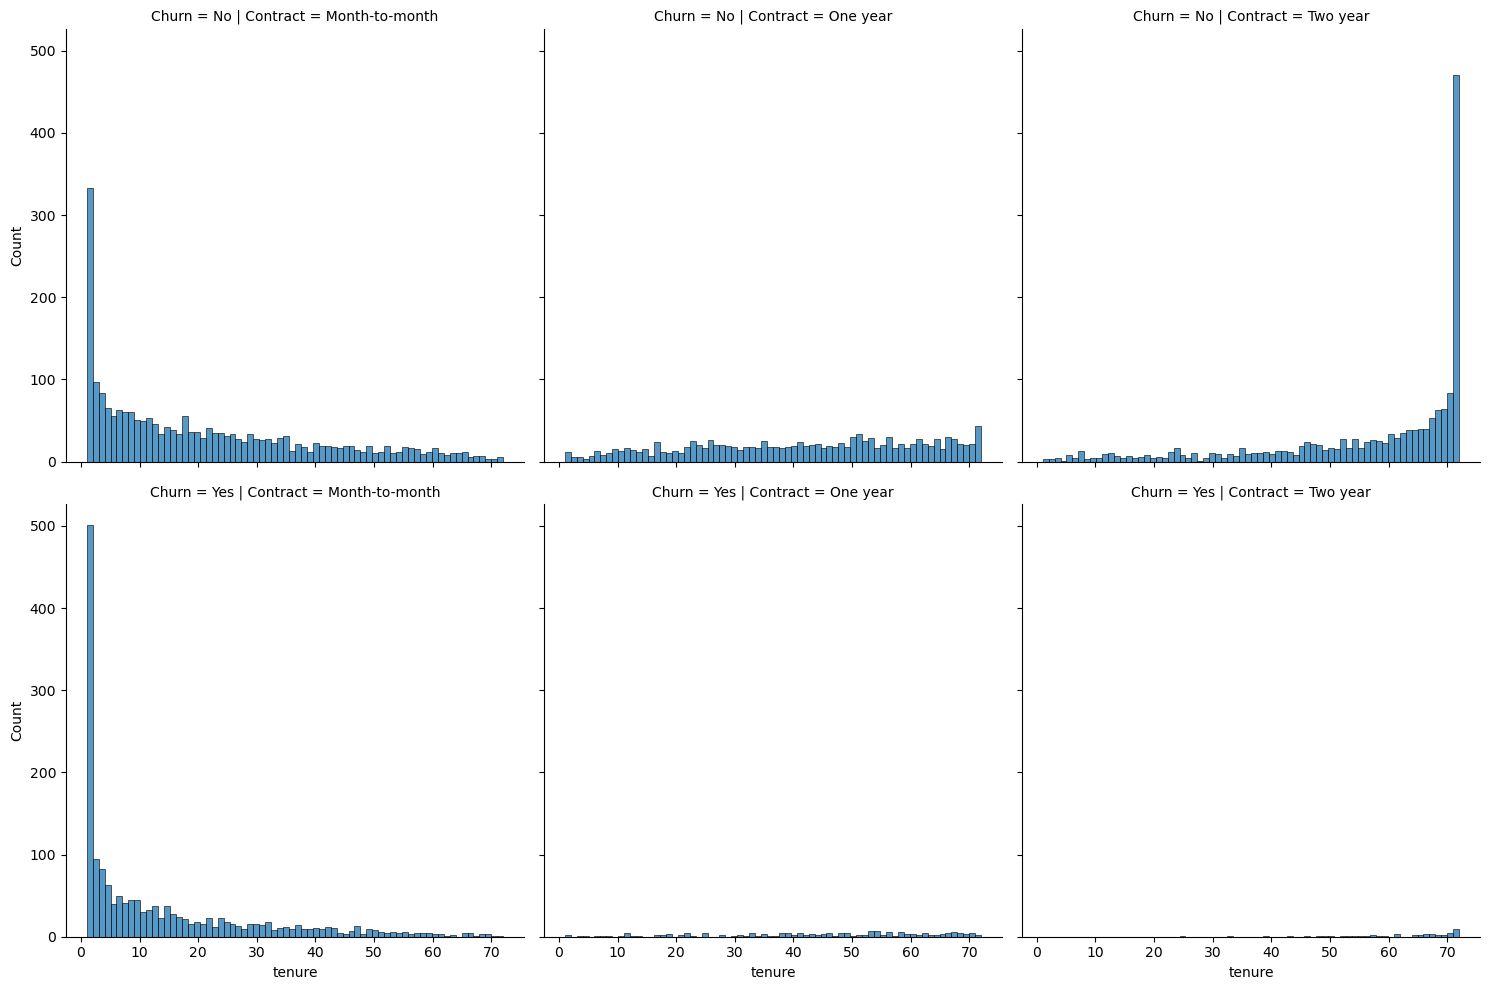

In [16]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

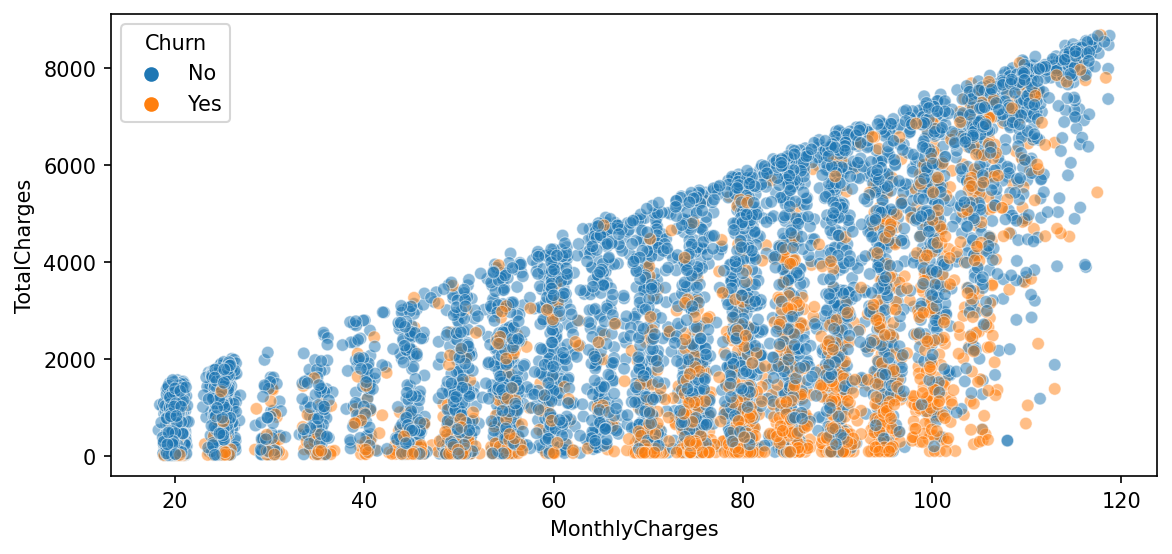

In [17]:
plt.figure(figsize=(9, 4), dpi=150)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [18]:
no_churn = df.groupby(['Churn', 'tenure']).count().T['No']
ys_churn = df.groupby(['Churn', 'tenure']).count().T['Yes']

In [19]:
churn_rate = 100 * ys_churn / (no_churn + ys_churn)

In [20]:
churn_rate.T['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

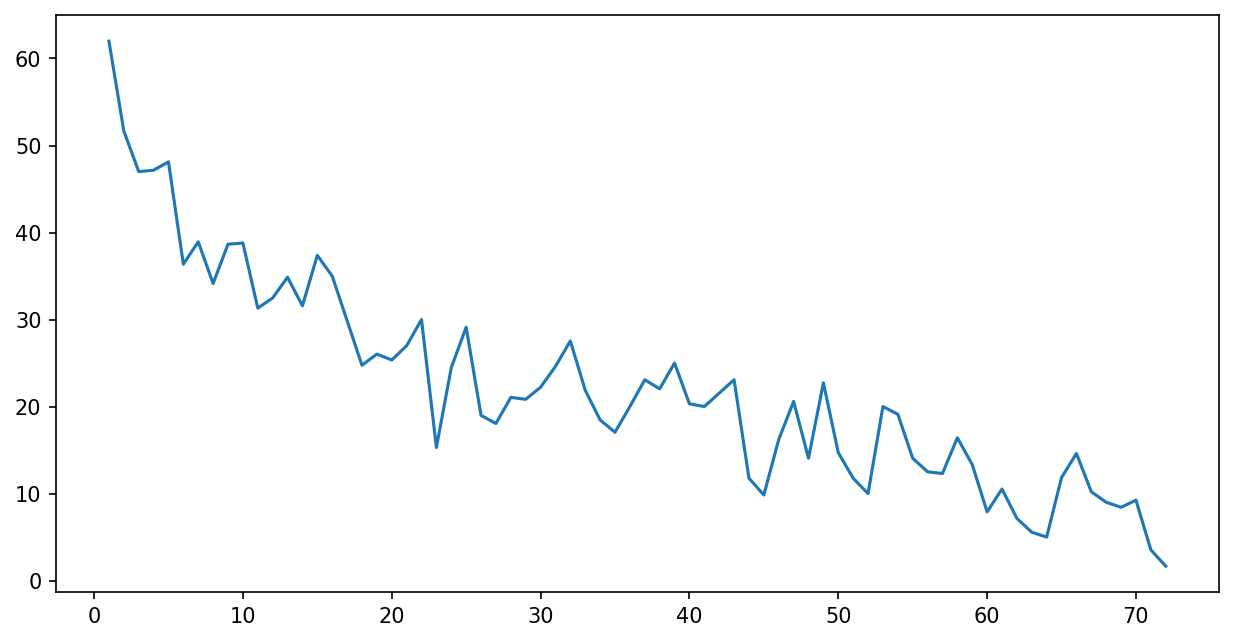

In [21]:
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(range(1,73),np.array(churn_rate.T['customerID']));

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [22]:
def cohort(data):
    if data < 13:
        return '0-12 месяцев'
    if data < 25:
        return '24-48 месяцев'
    if data < 49:
        return '24-48 месяцев'
    else:
        return 'Более 48 месяцев'

In [23]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [24]:
df.head(10)[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 месяцев
1,34,24-48 месяцев
2,2,0-12 месяцев
3,45,24-48 месяцев
4,2,0-12 месяцев
5,8,0-12 месяцев
6,22,24-48 месяцев
7,10,0-12 месяцев
8,28,24-48 месяцев
9,62,Более 48 месяцев


**Задание: Постройте график scatterplot для Total Charges и Monthly Charts, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

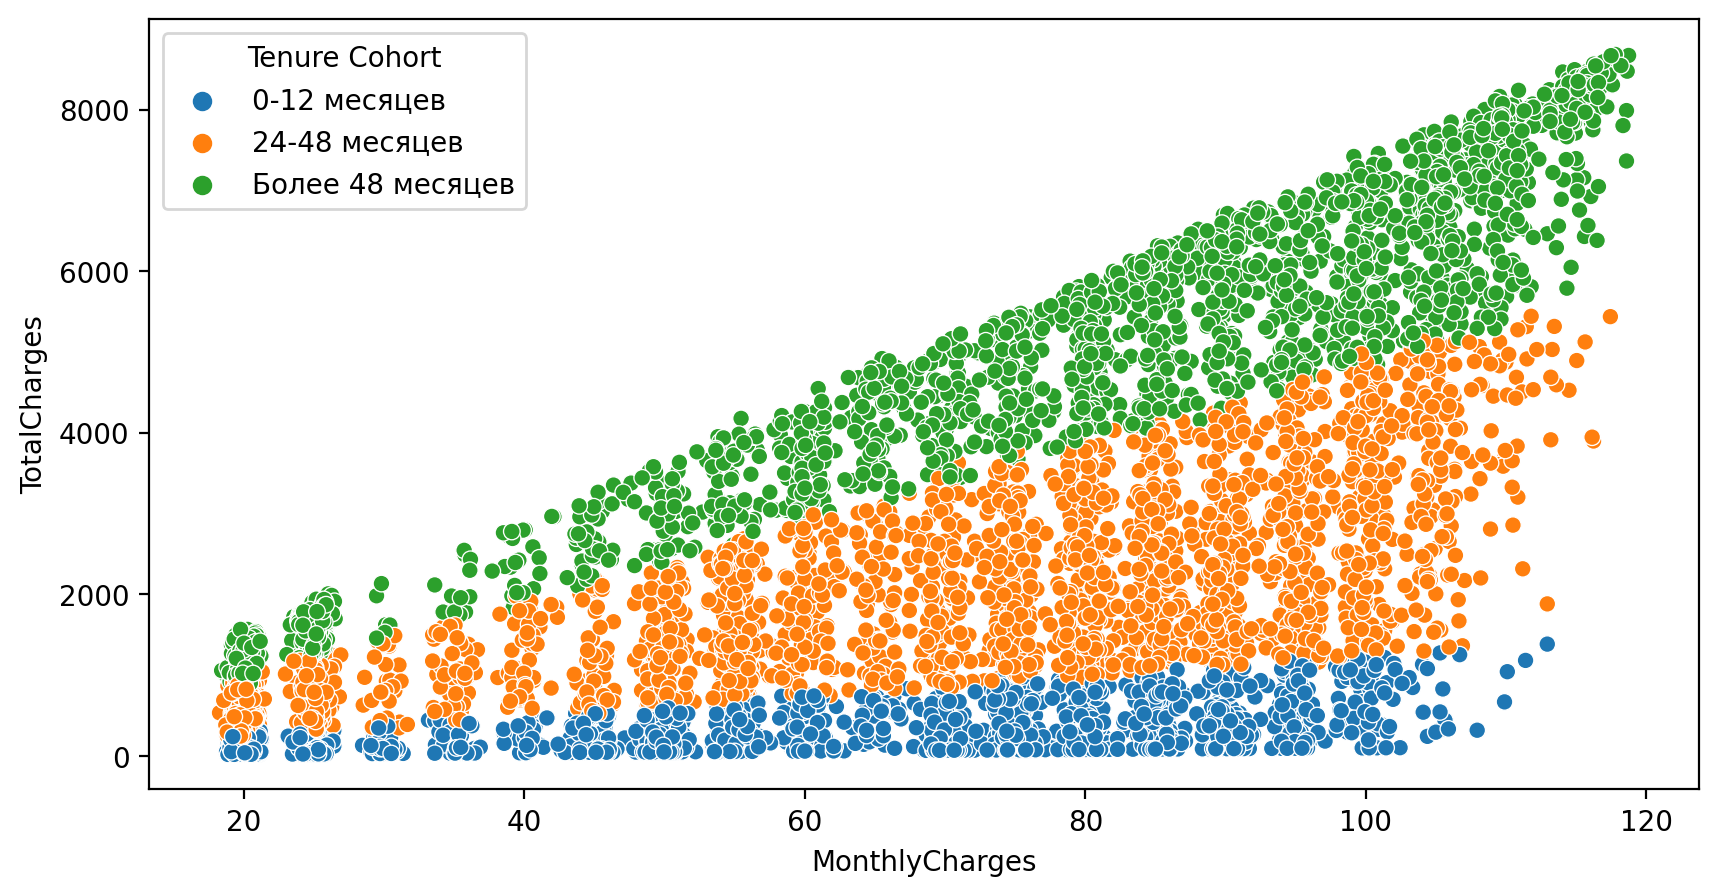

In [25]:
plt.figure(figsize=(10, 5), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort');

**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

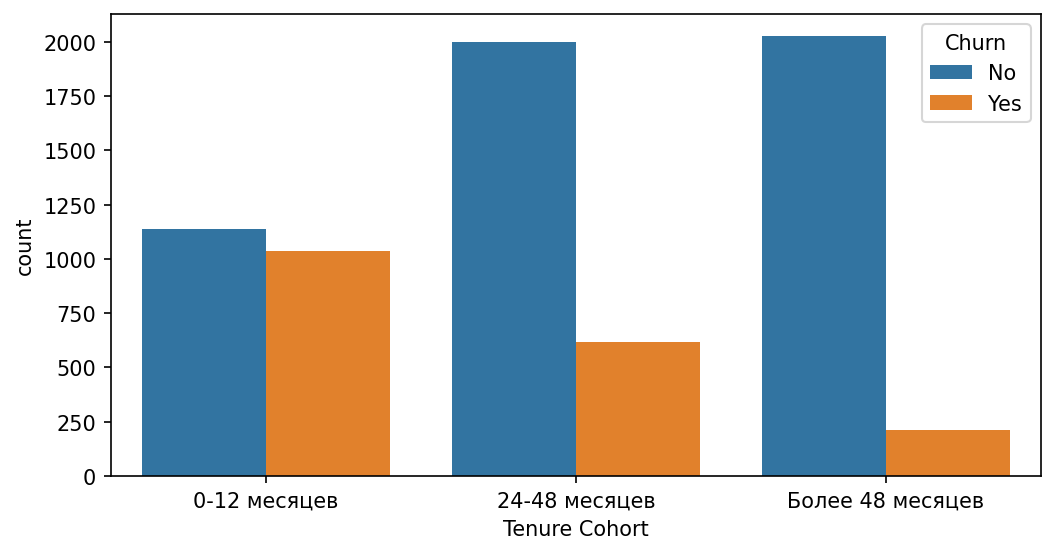

In [26]:
plt.figure(figsize=(8, 4), dpi=150)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

<Figure size 2000x800 with 0 Axes>

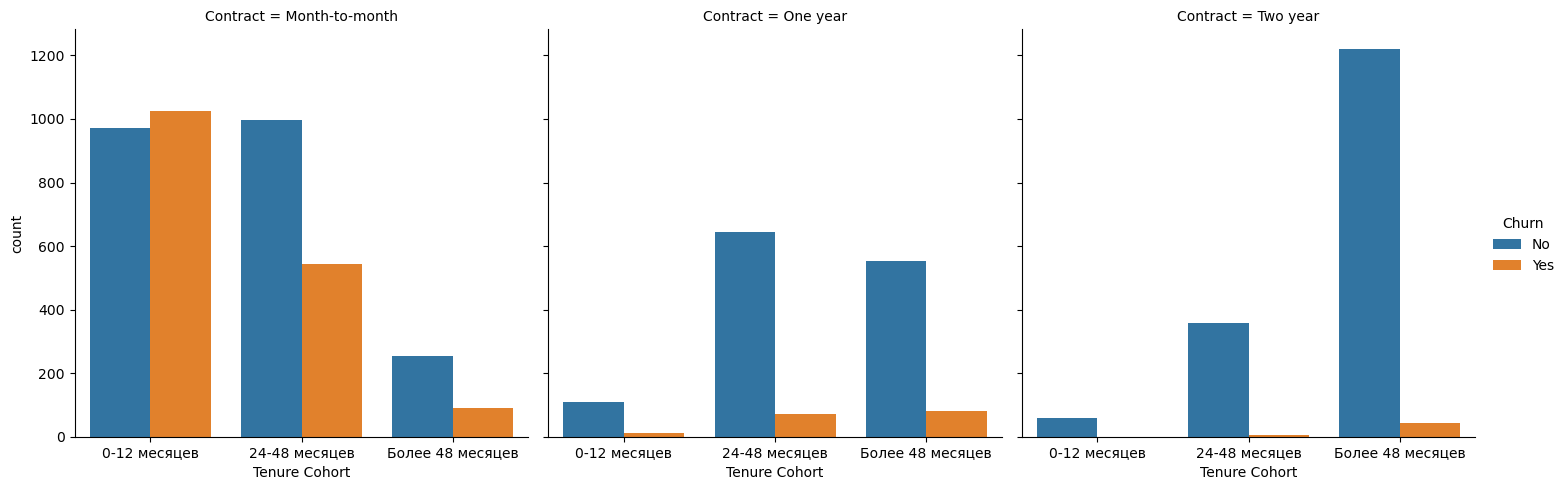

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [28]:
X = pd.get_dummies(df.drop(['customerID', 'Churn'], axis=1), drop_first=True)
y = df['Churn']

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
criterion = ['gini', 'entropy']
max_depth = list(range(1, 10))
max_features = list(range(1, 10))
param_grid = {'criterion': criterion,
              'max_depth': max_depth,
              'max_features': max_features}

In [33]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=101), param_grid, cv=5, verbose=True)

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=True)

In [35]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
y_pred = grid.predict(X_test)

In [37]:
confusion_matrix(y_test, y_pred)

array([[506,  51],
       [ 78,  69]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.57      0.47      0.52       147

    accuracy                           0.82       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.81      0.82      0.81       704



In [39]:
imp_feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=X.columns,\
                         columns=['feature_importance']).sort_values('feature_importance')

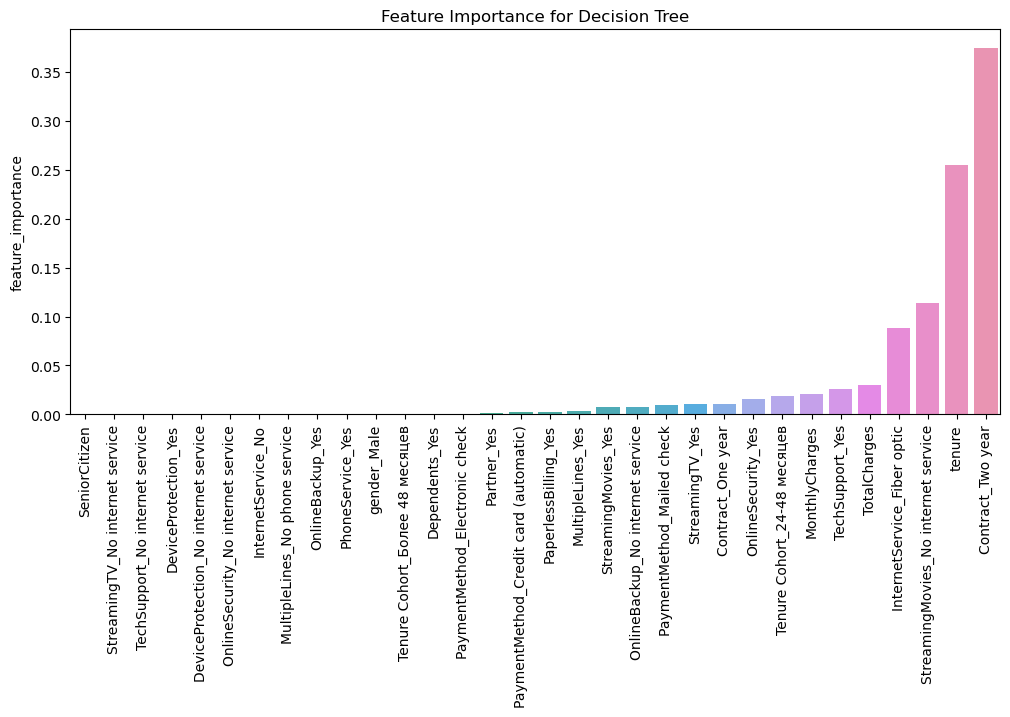

In [40]:
plt.figure(figsize=(12, 5))
sns.barplot(data=imp_feats, x=imp_feats.index, y='feature_importance')
plt.xticks(rotation=90)
plt.title('Feature Importance for Decision Tree');

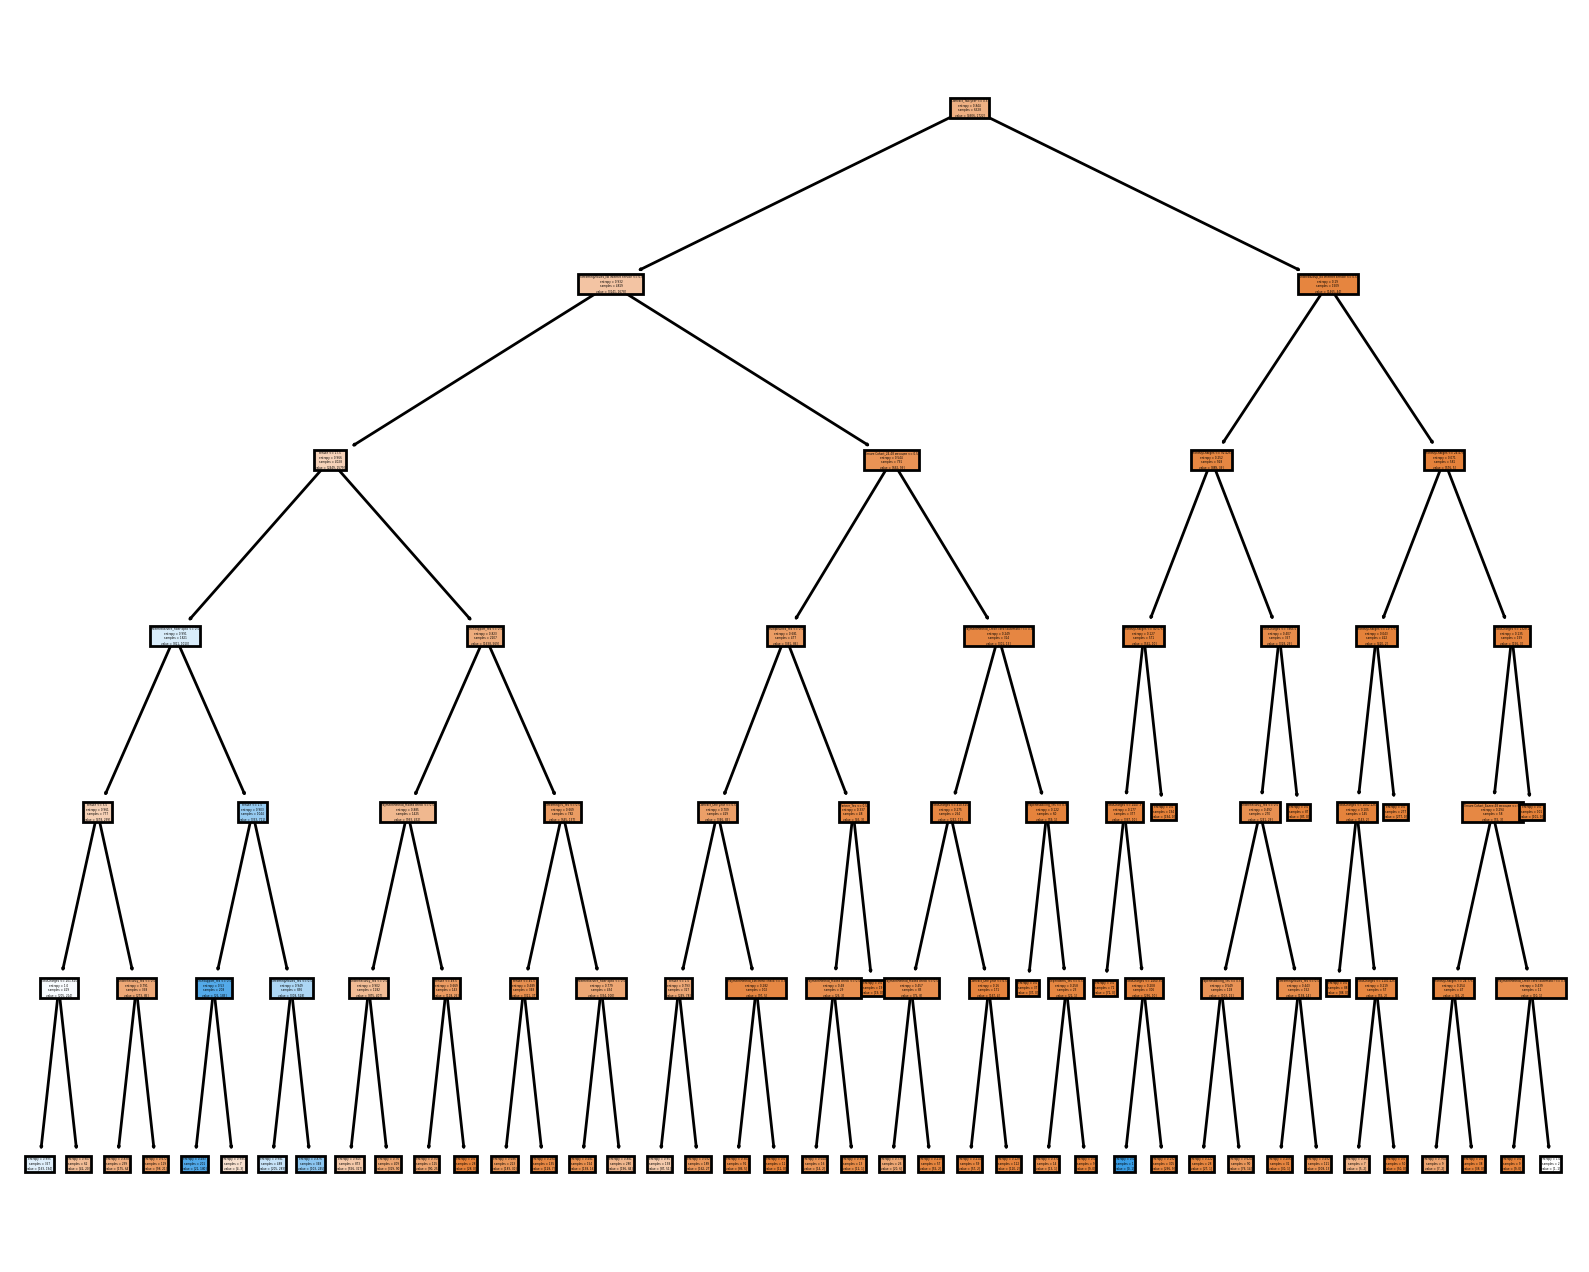

In [41]:
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(grid.best_estimator_,filled=True,feature_names=X.columns);

## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
n_estimators = [50, 100, 150, 200]
max_features = [5, 10, 30, 32]
max_depth = [5, 10, 15, 20]
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,}

In [66]:
grid = GridSearchCV(RandomForestClassifier(random_state=101, n_jobs=-1), param_grid, n_jobs=-1, verbose=True)

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 10, 30, 32],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=True)

In [72]:
y_pred = grid.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.59      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



In [76]:
confusion_matrix(y_test, y_pred)

array([[506,  51],
       [ 74,  73]], dtype=int64)

## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost или Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
n_estimators = [1, 5, 10, 50, 100, 150, 200]
max_depth = [3, 4, 5, 10]
learning_rate = [0.1, 0.2, 0.3, 0.5]
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'learning_rate': learning_rate}
              

In [83]:
grid = GridSearchCV(GradientBoostingClassifier(random_state=101), param_grid, verbose=True, n_jobs=-1)

In [84]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [1, 5, 10, 50, 100, 150, 200]},
             verbose=True)

In [85]:
y_pred = grid.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [89]:
confusion_matrix(y_test, y_pred)

array([[503,  54],
       [ 74,  73]], dtype=int64)

**Задания: Сравнивая результаты, какая модель у Вас работает лучше других?**

In [90]:
# получилось, что лучше всего работает RandomForest